In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.api as sm       
import statsmodels.formula.api as smf  
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [30]:
eksel = pd.read_csv(
    r"C:\archive\san-francisco-payroll_2011-2019.csv",
    sep=',', 
    low_memory=False
)
eksel.head(10)
#Učitavam naše podatke i gledam prvih 10 redova

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Status
0,Janet Lee Miller,Court Staff Attorney II,0.0,0.0,0.0,0.0,0.00,0.00,2019,PT
1,Gary Mar,Electrical Transit System Mech,97354.53,6996.5,2380.0,38855.9,106731.03,145586.93,2019,FT
2,Checil A Salvosa,Licensed Vocational Nurse,86118.0,17212.96,7272.08,34942.38,110603.04,145545.42,2019,FT
3,Kristian C Smock,"Stationary Eng, Sewage Plant",106816.03,0.0,0.0,38729.65,106816.03,145545.68,2019,FT
4,Yun Y Chang,Pharmacy Technician,94039.13,14947.99,1241.69,35330.26,110228.81,145559.07,2019,FT
5,Daniel Aguada,Automotive Mechanic,92643.3,4218.06,10225.39,38482.21,107086.75,145568.96,2019,FT
6,Krista Marie Ballard Kniffen,Communications Specialist,112108.77,0.0,0.0,33468.04,112108.77,145576.81,2019,FT
7,Douglas R Murray,Firefighter,88231.26,11055.4,8684.72,37607.57,107971.38,145578.95,2019,FT
8,Clint I Pereyra,Patient Care Assistant,67524.25,41957.03,7157.04,28942.07,116638.32,145580.39,2019,FT
9,Jhoana Marie M Zapanta,Police Officer 2,91610.12,15184.14,3284.27,35505.53,110078.53,145584.06,2019,FT


In [3]:
print(eksel.dtypes)
#Proveravam tip podataka

Employee Name            object
Job Title                object
Base Pay                 object
Overtime Pay             object
Other Pay                object
Benefits                 object
Total Pay               float64
Total Pay & Benefits    float64
Year                      int64
Status                   object
dtype: object


In [31]:
kolone = ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']

for col in kolone:
    eksel[col] = eksel[col].replace('Not Provided', np.nan).astype(float)
#Ovde sam vrednosti označene kao "Not Provided" zamenio sa NaN, a zatim konvertovao kolone u numerički tip (float).

In [5]:
print(eksel.dtypes)
#Proveravam tip podataka posle promene

Employee Name            object
Job Title                object
Base Pay                float64
Overtime Pay            float64
Other Pay               float64
Benefits                float64
Total Pay               float64
Total Pay & Benefits    float64
Year                      int64
Status                   object
dtype: object


In [32]:
eksel.replace(['Not Provided', 'N/A', '', 'Unknown'], np.nan, inplace=True)
#Ovde sam vrednosti označene kao "Not Provided", "N/A", "", i "Unknown" zamenio sa NaN, čime sam ujednačio sve oznake za nedostajuće podatke.

In [33]:
eksel.dropna(subset=['Employee Name', 'Job Title'], inplace=True)
print(eksel.isna().sum())
#Ovde sam obrisao redove kod kojih nedostaju vrednosti u kolonama "Employee Name" i "Job Title", jer su ti podaci ključni za dalju analizu.
#Nakon toga sam proverio broj preostalih NaN vrednosti u datasetu.

Employee Name                0
Job Title                    0
Base Pay                   606
Overtime Pay                 1
Other Pay                    1
Benefits                 36159
Total Pay                    0
Total Pay & Benefits         0
Year                         0
Status                  151499
dtype: int64


In [34]:
eksel.dropna(subset=['Overtime Pay','Other Pay','Base Pay'], inplace=True)
print(eksel.isna().sum())
#Izbacujem redove sa nedostajućom vrednošću

Employee Name                0
Job Title                    0
Base Pay                     0
Overtime Pay                 0
Other Pay                    0
Benefits                 36158
Total Pay                    0
Total Pay & Benefits         0
Year                         0
Status                  150893
dtype: int64


In [35]:
group_median = eksel.groupby('Job Title')['Benefits'].median()
#Ovde sam izračunao medianu kolone "Benefits" grupisanu po "Job Title"

In [36]:
global_median = eksel['Benefits'].median()

def impute_benefits(row):
    if pd.isna(row['Benefits']):
        group_value = group_median.get(row['Job Title'], np.nan)
        return group_value if not np.isnan(group_value) else global_median
    else:
        return row['Benefits']
eksel['Benefits'] = eksel.apply(impute_benefits, axis=1)
#Definisao sam globalnu medianu beneficija i funkciju koja popunjava nedostajuće vrednosti u koloni "Benefits"

In [37]:
print(eksel['Benefits'].isna().sum())
#Provera

0


In [38]:
print(eksel['Status'].value_counts(dropna=False))
#Provera varijable status

Status
NaN    150893
FT     134140
PT      71755
Name: count, dtype: int64


In [39]:
eksel['Status'] = eksel['Status'].fillna('UNKNOWN')
#Dodajemo vrednost 'UNKNOWN'

In [40]:
print(eksel.isna().sum())
#Proveravam da li sam ispravio sve vrednosti

Employee Name           0
Job Title               0
Base Pay                0
Overtime Pay            0
Other Pay               0
Benefits                0
Total Pay               0
Total Pay & Benefits    0
Year                    0
Status                  0
dtype: int64


In [41]:
#Proveravam broj svih redova i kolona
print(eksel.shape)


(356788, 10)


In [42]:
# Osnovna deskriptivna statistika
desc_stats = eksel[['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']].describe()
print((desc_stats).round(3))

         Base Pay  Overtime Pay   Other Pay    Benefits   Total Pay  \
count  356788.000    356788.000  356788.000  356788.000  356788.000   
mean    70714.443      5868.827    3470.124   25695.110   80053.395   
std     46354.340     13220.829    7347.147   14657.944   54328.417   
min     -9942.330      -292.800   -7058.590  -13939.420    -618.130   
25%     35554.068         0.000       0.000   16276.445   39086.930   
50%     68588.015         0.000     720.000   28750.420   76127.060   
75%    100951.950      5362.702    3978.632   34844.540  113374.100   
max    592394.340    315896.410  400184.250  125891.730  592394.340   

       Total Pay & Benefits  
count            356788.000  
mean             102834.848  
std               68022.466  
min               -3628.780  
25%               49559.900  
50%              101991.050  
75%              145443.620  
max              712802.360  


In [43]:
status_grouped = eksel.groupby('Status')[['Base Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']].mean()
print(status_grouped.round(3))
#prosečne vrednosti plata i beneficija grupisane po statusu zaposlenih

          Base Pay   Benefits   Total Pay  Total Pay & Benefits
Status                                                         
FT       97432.315  35021.892  110482.609            145504.501
PT       27351.702   8073.091   30778.264             38851.355
UNKNOWN  67583.471  25783.738   76434.686             95329.055


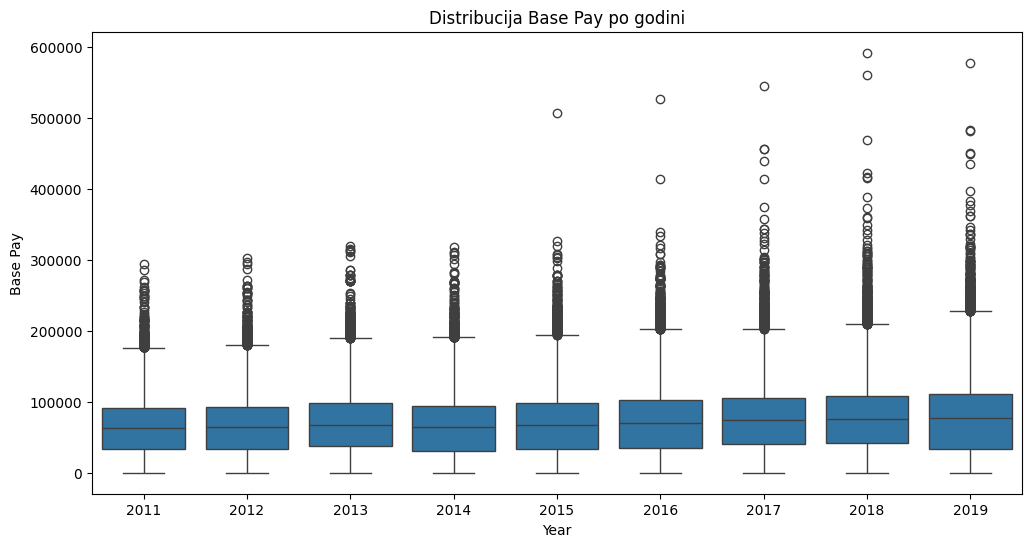

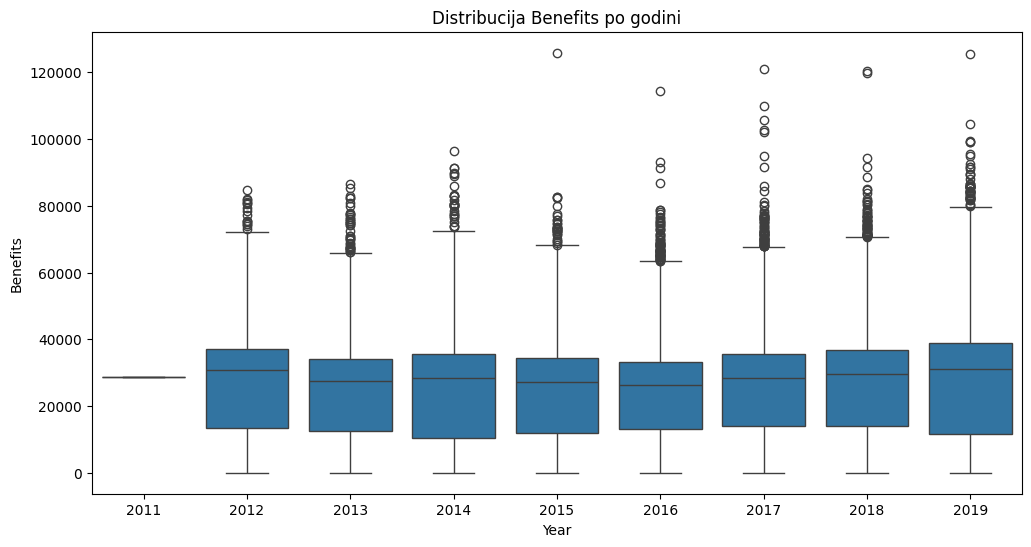

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=eksel, x='Year', y='Base Pay')
plt.title("Distribucija Base Pay po godini")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=eksel, x='Year', y='Benefits')
plt.title("Distribucija Benefits po godini")
plt.show()
#Grafici (počinjeno deskkriptivnu analizu)

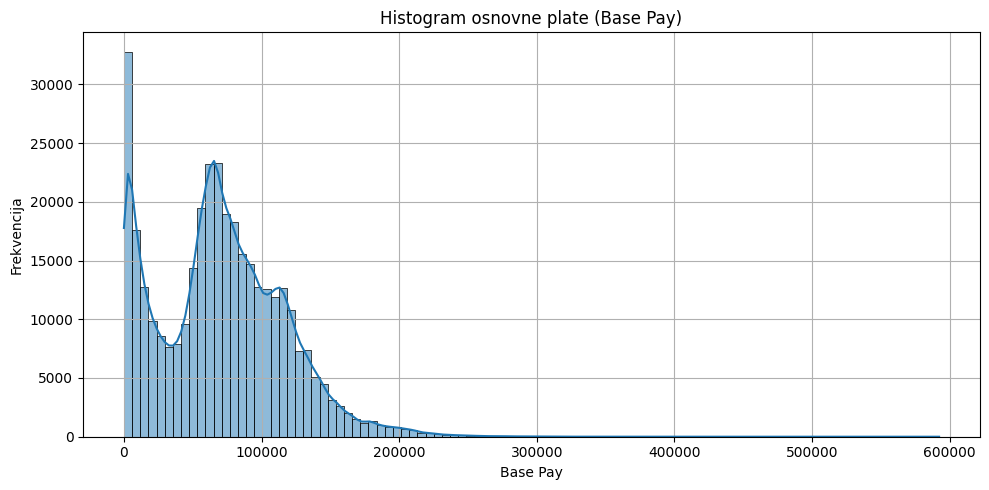

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(eksel['Base Pay'], bins=100, kde=True)
plt.title('Histogram osnovne plate (Base Pay)')
plt.xlabel('Base Pay')
plt.ylabel('Frekvencija')
plt.grid(True)
plt.tight_layout()
plt.show()

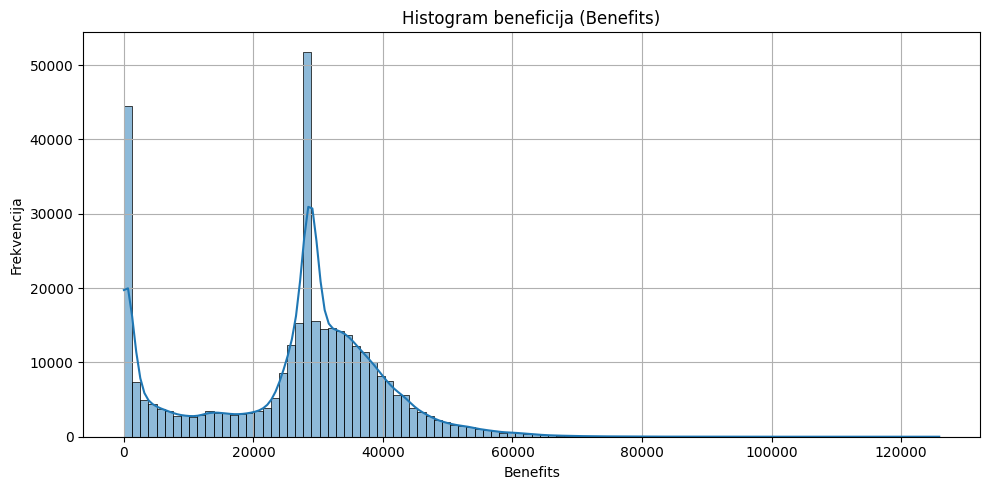

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(eksel['Benefits'], bins=100, kde=True)
plt.title('Histogram beneficija (Benefits)')
plt.xlabel('Benefits')
plt.ylabel('Frekvencija')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
eksel['Benefit Ratio'] = eksel['Benefits'] / eksel['Base Pay']
eksel['Benefit Ratio'] = eksel['Benefit Ratio'].replace([np.inf, -np.inf], np.nan)
eksel = eksel[eksel['Benefit Ratio'] <= 1]
eksel['Benefit Ratio'] = eksel['Benefit Ratio'].fillna(eksel['Benefit Ratio'].median())

print(eksel['Benefit Ratio'].describe())
#Uvodimo Benefit Ratio

count    342393.000000
mean          0.345911
std           0.147531
min          -0.263422
25%           0.296007
50%           0.364170
75%           0.428859
max           0.999692
Name: Benefit Ratio, dtype: float64


In [45]:
job_status_counts = eksel.groupby(['Job Title', 'Status']).size().unstack(fill_value=0)
has_both = job_status_counts[(job_status_counts.get('FT', 0) > 0) & (job_status_counts.get('PT', 0) > 0)]
common_both = has_both.sum(axis=1).sort_values(ascending=False).head(10).index
parovi = [(title, status) for title in common_both for status in ['FT', 'PT']]
g = (
    eksel.groupby(['Job Title', 'Status'])[['Base Pay', 'Benefits', 'Benefit Ratio']]
    .mean()
    .reset_index()
)
tabela = (
    pd.merge(
        pd.DataFrame(parovi, columns=['Job Title', 'Status']),
        g,
        on=['Job Title', 'Status'],
        how='left',
    )
    .round({'Base Pay': 0, 'Benefits': 0, 'Benefit Ratio': 2})
)

display(tabela[['Job Title', 'Status', 'Base Pay', 'Benefits', 'Benefit Ratio']])
#Izbor pozicija u ovoj tabeli zasniva se na učestalosti uključene su one radne pozicije koje imaju i FT i PT zaposlene,
#uz uslov da su među deset najbrojnijih u datasetu.

,Job Title,Status,Base Pay,Benefits,Benefit Ratio
0,Transit Operator,FT,67502.0,30734.0,0.46
1,Transit Operator,PT,25481.0,12545.0,0.49
2,Special Nurse,FT,145907.0,2232.0,0.01
3,Special Nurse,PT,33862.0,2706.0,0.13
4,Registered Nurse,FT,133739.0,42704.0,0.32
5,Registered Nurse,PT,76135.0,24320.0,0.32
6,Firefighter,FT,106489.0,39939.0,0.38
7,Firefighter,PT,30755.0,11623.0,0.38
8,Custodian,FT,57543.0,26908.0,0.47
9,Custodian,PT,22908.0,9263.0,0.36


Pearson correlation: 0.910
Spearman correlation: 0.941


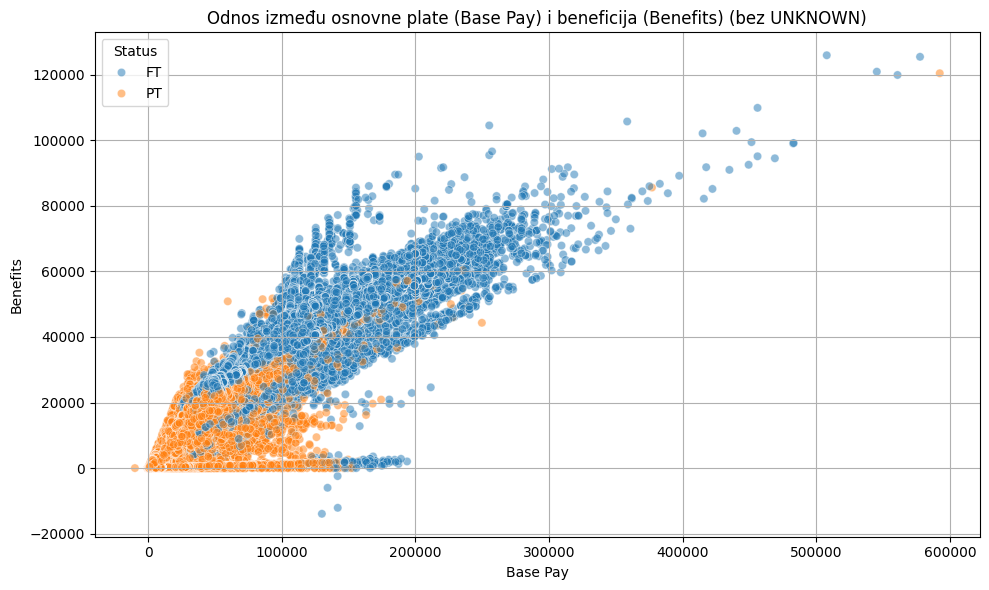

In [20]:
eksel_clean = eksel[eksel['Status'].isin(['FT', 'PT'])].copy()

pearson_corr = eksel_clean['Base Pay'].corr(eksel_clean['Benefits'], method='pearson')
spearman_corr = eksel_clean['Base Pay'].corr(eksel_clean['Benefits'], method='spearman')

print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=eksel_clean, x='Base Pay', y='Benefits', hue='Status', alpha=0.5)
plt.title('Odnos između osnovne plate (Base Pay) i beneficija (Benefits) (bez UNKNOWN)')
plt.xlabel('Base Pay')
plt.ylabel('Benefits')
plt.legend(title='Status')
plt.grid(True)
plt.tight_layout()
plt.show()


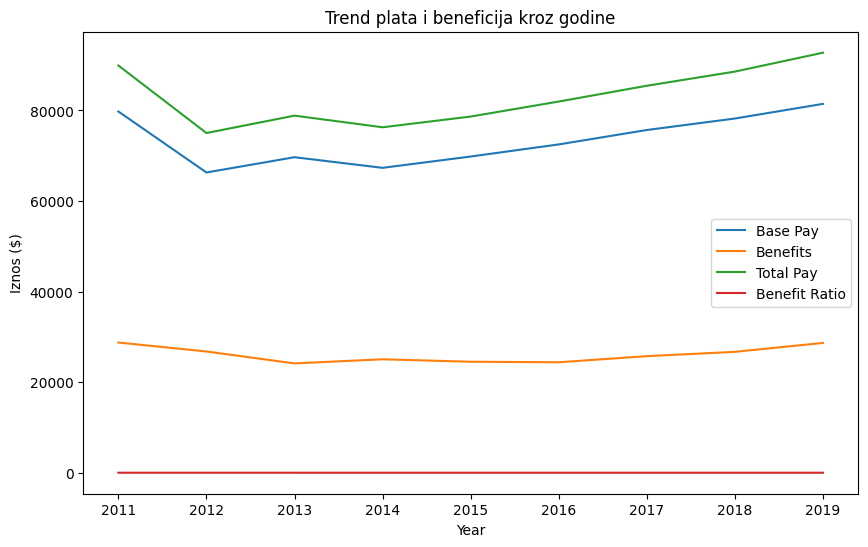

In [38]:
yearly = eksel.groupby('Year')[['Base Pay','Benefits','Total Pay','Benefit Ratio']].mean()

yearly.plot(figsize=(10,6))
plt.title('Trend plata i beneficija kroz godine')
plt.ylabel('Iznos ($)')
plt.show()


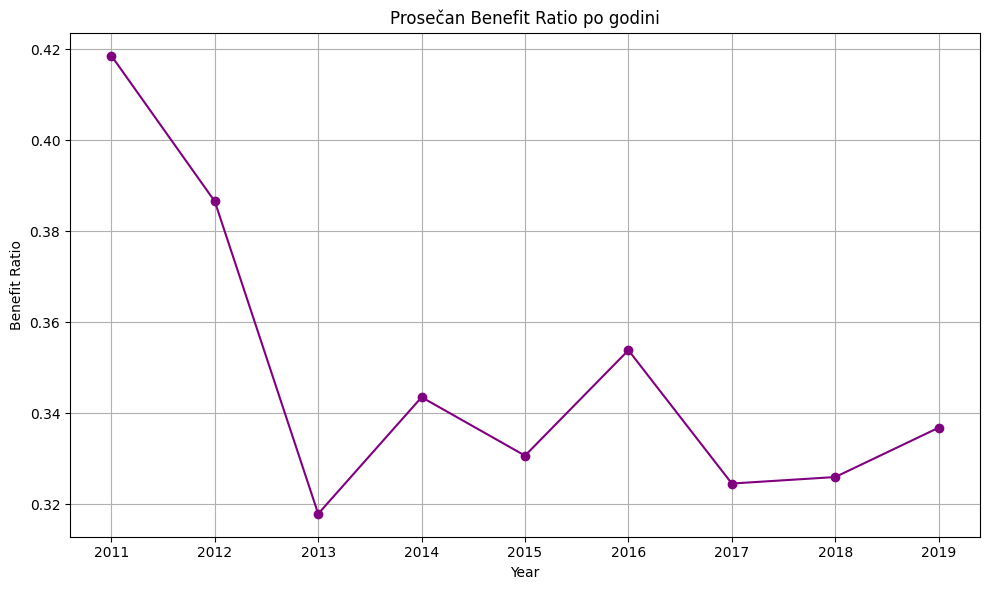

In [37]:
yearly_avg = (eksel.groupby('Year')['Benefit Ratio']
    .mean()
    .reset_index())

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['Year'], yearly_avg['Benefit Ratio'], marker='o', color='purple')
plt.title('Prosečan Benefit Ratio po godini')
plt.xlabel('Year')
plt.ylabel('Benefit Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


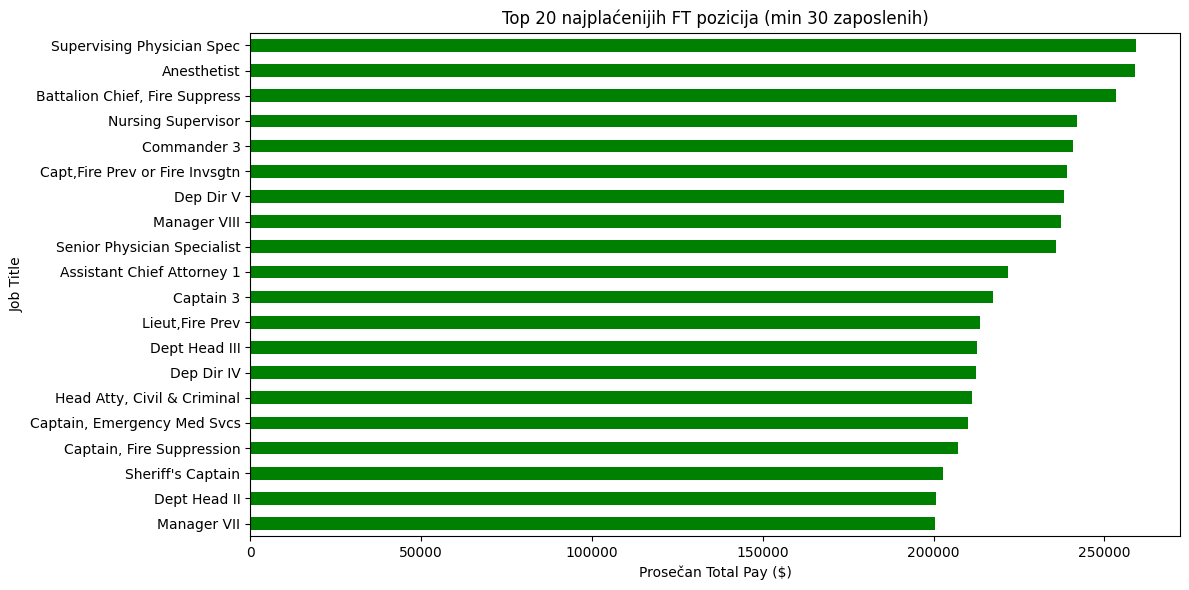

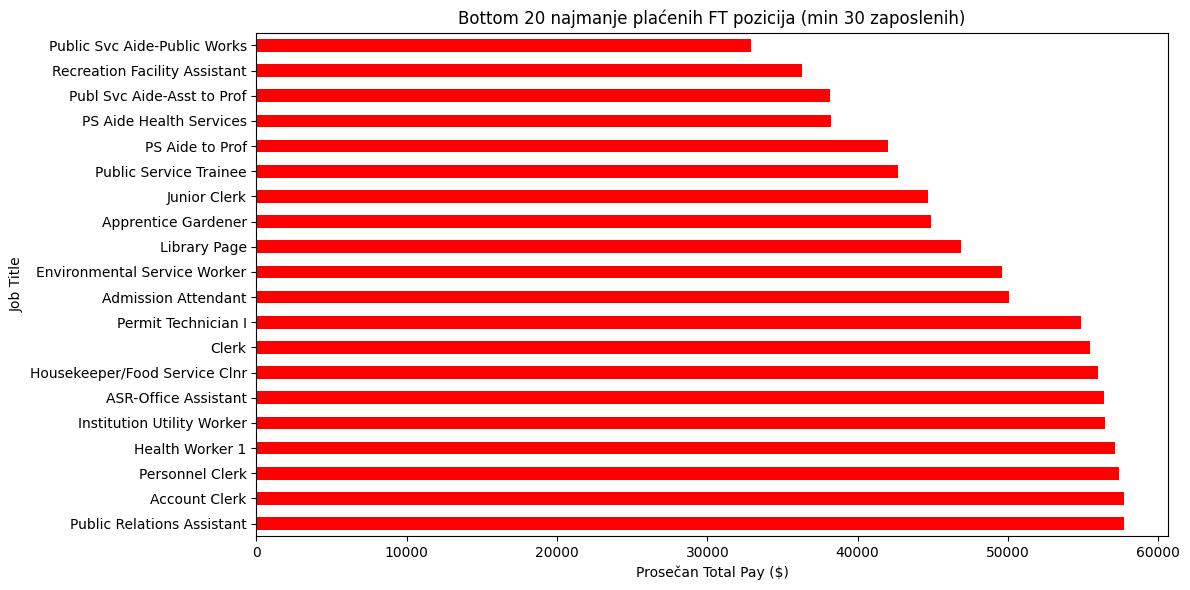

In [36]:
ft_eksel = eksel[eksel['Status'] == 'FT']
#Ostavio sam samo FT radnike
ft_counts = ft_eksel['Job Title'].value_counts()
valid_titles = ft_counts[ft_counts >= 30].index
#Smatrao sam da je bolje da pokažem samo pozicije da ima neki značajni broj zaposlenih
ft_eksel_valid = ft_eksel[ft_eksel['Job Title'].isin(valid_titles)]
ft_job_pay = ft_eksel_valid.groupby('Job Title')['Total Pay'].mean().sort_values(ascending=False)

ft_top_20 = ft_job_pay.head(20)
ft_bottom_20 = ft_job_pay.tail(20)

plt.figure(figsize=(12, 6))
ft_top_20.sort_values().plot(kind='barh', color='green')
plt.title('Top 20 najplaćenijih FT pozicija (min 30 zaposlenih)')
plt.xlabel('Prosečan Total Pay ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
ft_bottom_20.plot(kind='barh', color='red')
plt.title('Bottom 20 najmanje plaćenih FT pozicija (min 30 zaposlenih)')
plt.xlabel('Prosečan Total Pay ($)')
plt.tight_layout()
plt.show()

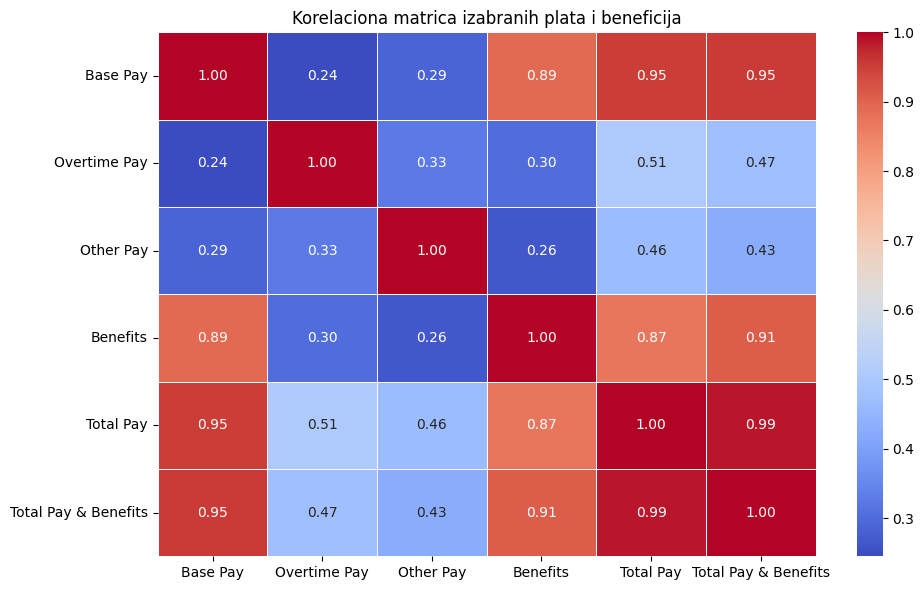

In [48]:
num_vars = eksel[['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']]
#Moram da ostavim samo numeričke
corr_matrix = num_vars.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelaciona matrica izabranih plata i beneficija')
plt.tight_layout()
plt.show()

#Prikazana korelaciona matrica pokazuje da su Base Pay, Total Pay i Total Pay & Benefits snažno povezani (r > 0.95),
#što je i očekivano jer se ukupna primanja zasnivaju na osnovnoj plati. 
#S druge strane, Overtime Pay i Other Pay imaju znatno slabiju korelaciju sa osnovnim platama i beneficijama, što ukazuje da su ti dodaci manje
#sistematski raspodeljeni i više variraju među zaposlenima.

In [46]:
for status in eksel['Status'].unique():
    sub = eksel[eksel['Status'] == status]
    pearson = sub['Base Pay'].corr(sub['Benefits'], method='pearson')
    spearman = sub['Base Pay'].corr(sub['Benefits'], method='spearman')
    print(f"{status} → Pearson: {pearson:.3f}, Spearman: {spearman:.3f}")

#Rezultati pokazuju da postoji jaka pozitivna korelacija između osnovne plate i beneficija kod zaposlenih sa statusom FT (Pearson 0.87), 
#dok je povezanost nešto slabija kod zaposlenih sa statusom PT (Pearson 0.65). Ovakvi nalazi ukazuju da su beneficije kod stalno zaposlenih
#proporcionalnije osnovnoj plati, dok su kod zaposlenih sa skraćenim radnim vremenom manje konzistentne i podložnije varijacijama.

FT → Pearson: 0.863, Spearman: 0.907
PT → Pearson: 0.812, Spearman: 0.834
UNKNOWN → Pearson: 0.860, Spearman: 0.849


In [49]:
X = eksel[['Base Pay','Benefits','Benefit Ratio']].copy()

X = X.replace([np.inf, -np.inf], np.nan)  
X = X.fillna(X.median())                   

for col in X.columns:
    X[col] = np.clip(X[col], X[col].quantile(0.01), X[col].quantile(0.99))


print("NaN vrednosti:\n", X.isna().sum())
print("\n")
print("Beskonačne vrednosti vrednosti:\n", np.isinf(X).sum())
#PRoveravam da li sam lepo očitio podatke

NaN vrednosti:
 Base Pay         0
Benefits         0
Benefit Ratio    0
dtype: int64


Beskonačne vrednosti vrednosti:
 Base Pay         0
Benefits         0
Benefit Ratio    0
dtype: int64


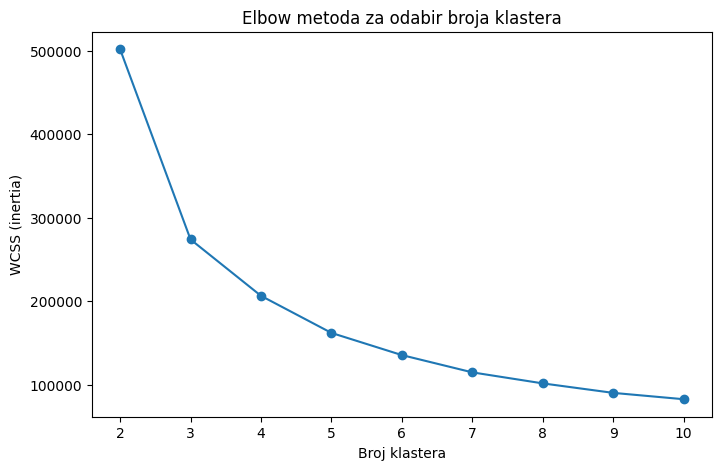

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), inertia, marker='o')
plt.title('Elbow metoda za odabir broja klastera')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS (inertia)')
plt.show()
#Prvo skaliram podatke i onda radim motodu lakta i biram broj 4

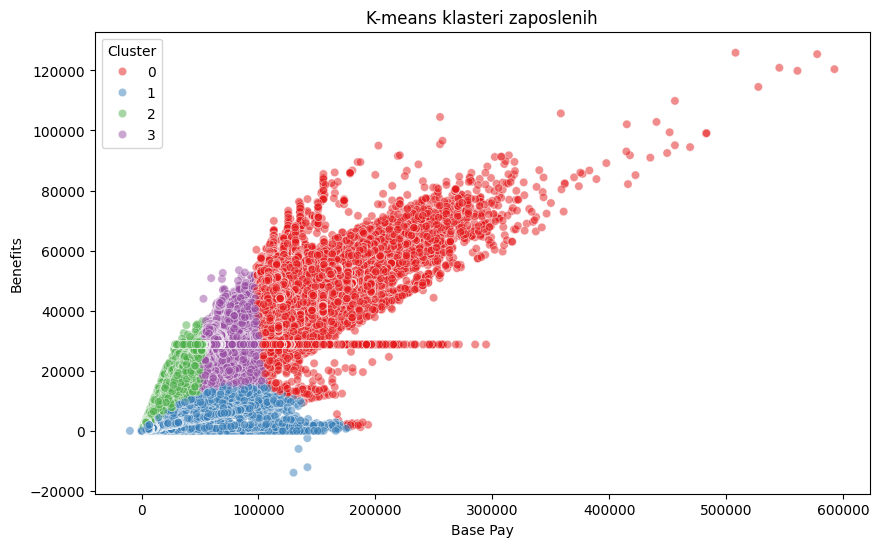

In [51]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
eksel['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(data=eksel, x='Base Pay', y='Benefits', hue='Cluster', alpha=0.5, palette='Set1')
plt.title('K-means klasteri zaposlenih')
plt.show()

In [52]:
cluster_summary = (eksel.groupby('Cluster')[['Base Pay', 'Benefits', 'Benefit Ratio']]
    .mean()
    .round({'Base Pay': 0, 'Benefits': 0, 'Benefit Ratio': 2})
    .reset_index())

cluster_summary
#Možemo videti da smo klasterovali na 4 grupe :
#niske plate sa malim benefitima (klaster 1)
#niže plate ali relativno visoke beneficije (klaster 3)
#srednje plate sa dobrim benefitima (klaster 0)
#visoke plate sa stabilnim benefitima (klaster 2)

,Cluster,Base Pay,Benefits,Benefit Ratio
0,0,131439.0,41092.0,0.32
1,1,17584.0,1669.0,0.09
2,2,31989.0,16118.0,0.50
3,3,74518.0,29743.0,0.41


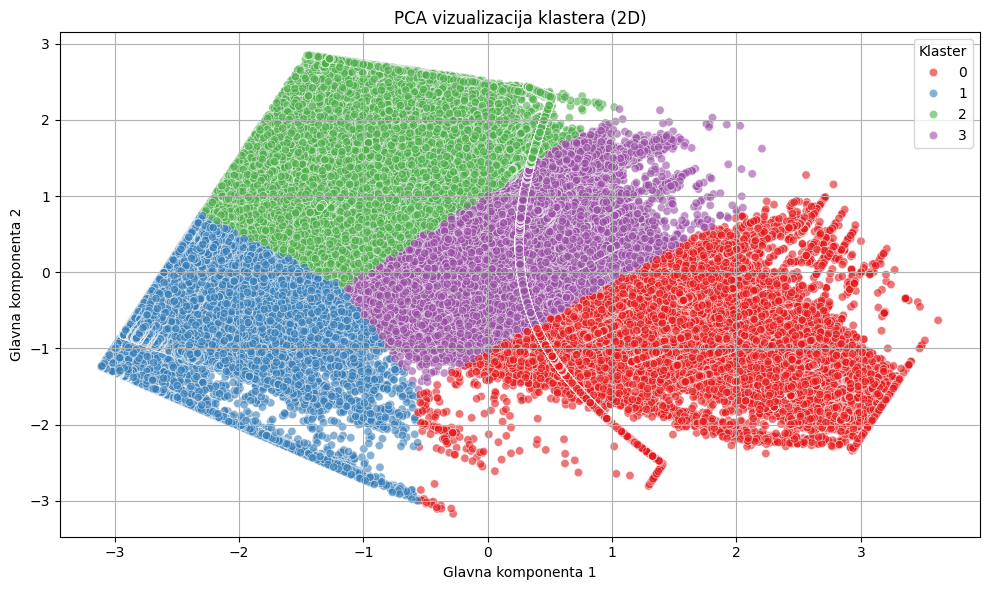

PCA1 objašnjava 68.22% varijanse
PCA2 objašnjava 30.44% varijanse
Ukupno objašnjeno: 98.66%

Doprinos varijabli PCA komponentama (loadings):
                   PCA1      PCA2
Benefits       0.690285 -0.065724
Base Pay       0.626963 -0.442737
Benefit Ratio  0.361142  0.894240


In [53]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

eksel['PCA1'] = pca_components[:, 0]
eksel['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=eksel, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.6)
plt.title('PCA vizualizacija klastera (2D)')
plt.xlabel('Glavna komponenta 1')
plt.ylabel('Glavna komponenta 2')
plt.legend(title='Klaster')
plt.grid(True)
plt.tight_layout()
plt.show()

explained_var = pca.explained_variance_ratio_
total_var = np.sum(explained_var)
print(f"PCA1 objašnjava {explained_var[0]*100:.2f}% varijanse")
print(f"PCA2 objašnjava {explained_var[1]*100:.2f}% varijanse")
print(f"Ukupno objašnjeno: {total_var*100:.2f}%")


loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PCA1', 'PCA2'],
    index=X.columns  # X su tvoje originalne numeričke kolone
)
print("\nDoprinos varijabli PCA komponentama (loadings):")
print(loadings.sort_values(by='PCA1', key=lambda x: abs(x), ascending=False))




Logistic Regression
Confusion matrix:
[[31834 19552]
 [16739 34584]]

Klasifikacija:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64     51386
           1       0.64      0.67      0.66     51323

    accuracy                           0.65    102709
   macro avg       0.65      0.65      0.65    102709
weighted avg       0.65      0.65      0.65    102709


 Random Forest
MSE: 27956736.46759543
R² Score: 0.8691447800534117


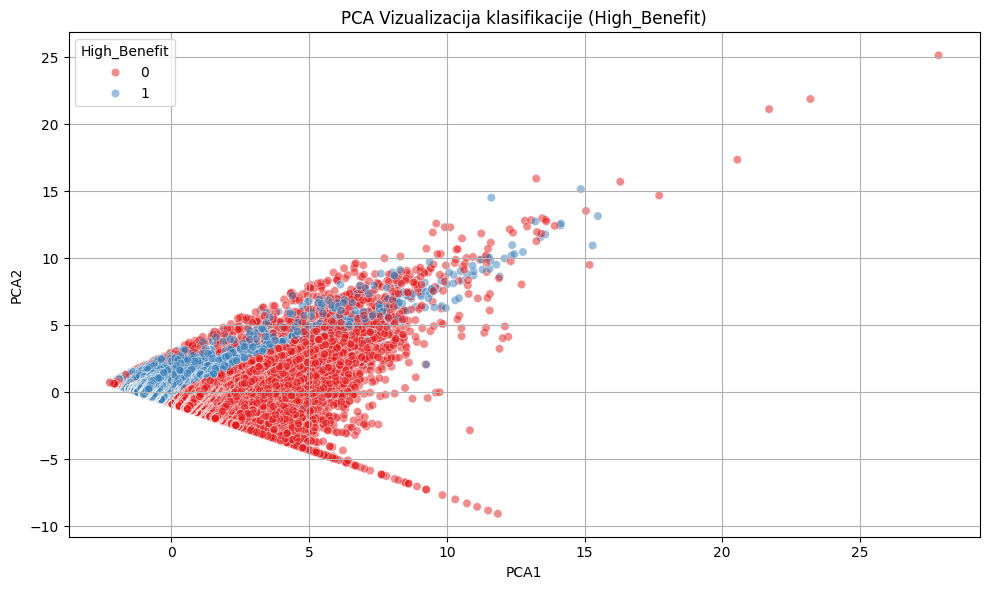

In [71]:

median_ratio = eksel['Benefit Ratio'].median()
eksel['High_Benefit'] = (eksel['Benefit Ratio'] > median_ratio).astype(int)


features = ['Base Pay','Overtime Pay','Other Pay','Total Pay']
X = eksel[features].fillna(0)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
eksel['PCA1'] = X_pca[:,0]
eksel['PCA2'] = X_pca[:,1]


y_class = eksel['High_Benefit']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_pca, y_class, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train_c, y_train_c)
y_pred_c = logreg.predict(X_test_c)

print("\nLogistic Regression")
print("Confusion matrix:")
print(confusion_matrix(y_test_c, y_pred_c))
print("\nKlasifikacija:")
print(classification_report(y_test_c, y_pred_c))


y_reg = eksel['Benefits']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_pca, y_reg, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_r, y_train_r)
y_pred_r = rf.predict(X_test_r)

print("\n Random Forest")
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))


plt.figure(figsize=(10,6))
sns.scatterplot(data=eksel, x='PCA1', y='PCA2', hue='High_Benefit', palette='Set1', alpha=0.5)
plt.title('PCA Vizualizacija klasifikacije (High_Benefit)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
median_ratio = eksel['Benefit Ratio'].median()
eksel['High_Benefit'] = (eksel['Benefit Ratio'] > median_ratio).astype(int)

features = ['Base Pay','Overtime Pay','Other Pay','Total Pay']
X = eksel[features].fillna(0)
y = eksel['High_Benefit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Results
[[30659 20727]
 [16322 35001]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.62     51386
           1       0.63      0.68      0.65     51323

    accuracy                           0.64    102709
   macro avg       0.64      0.64      0.64    102709
weighted avg       0.64      0.64      0.64    102709



In [50]:

X = eksel[['Base Pay','Overtime Pay','Other Pay','Total Pay']].fillna(0)
y = eksel['Benefits']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(
    n_estimators=100,   
    max_depth=15,       
    n_jobs=-1,         
    random_state=42
)
#Oprimizovao sam random forst da bih mogao da odradim testiranje
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 24835999.167228367
R2 Score: 0.8837518056734581


In [ ]:
#Logistička regresija je ostvarila tačnost od oko 65%, što pokazuje da linearni modeli nisu dovoljno precizni da pouzdano razdvoje zaposlene
#sa visokim i niskim benefitima. Sa druge strane, Random Forest regresija je ostvarila R² od 0.88, što ukazuje da varijable povezane sa platom
#imaju snažnu prediktivnu moć u proceni beneficija. Ovi rezultati sugerišu da beneficije nisu slučajne, već u velikoj meri zavise od osnovne plate
# i dodatnih komponenti zarade.

Base Pay        0.934119
Total Pay       0.039623
Other Pay       0.016423
Overtime Pay    0.009835
dtype: float64


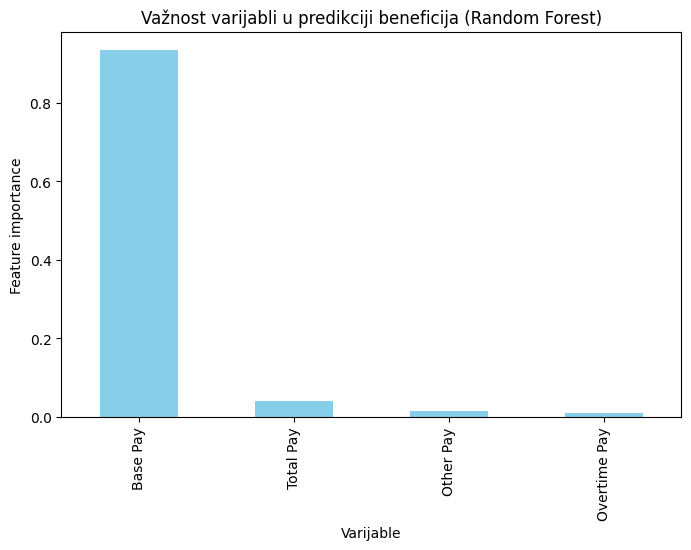

In [52]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print(feature_importances)

plt.figure(figsize=(8,5))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Važnost varijabli u predikciji beneficija (Random Forest)")
plt.ylabel("Feature importance")
plt.xlabel("Varijable")
plt.show()

#Model potvrđuje da su beneficije najviše određene osnovnom platom, dok dodatni elementi zarade imaju marginalni uticaj.

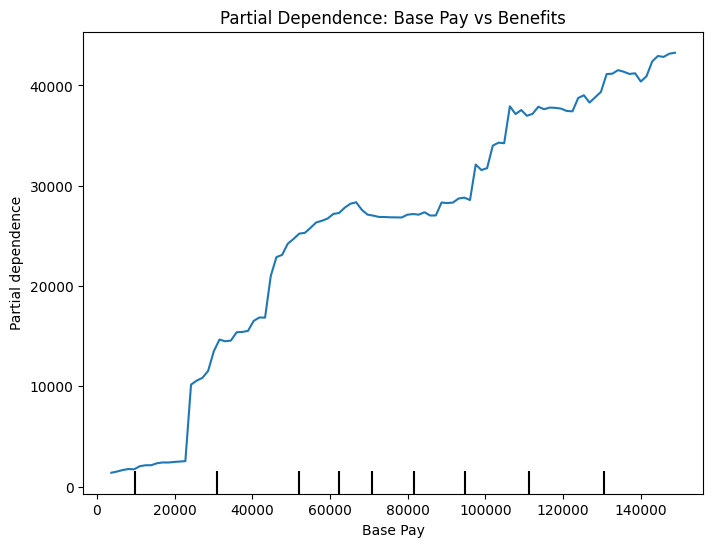

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
PartialDependenceDisplay.from_estimator(
    rf,               
    X_train,          
    ['Base Pay'],     
    ax=ax
)
plt.title("Partial Dependence: Base Pay vs Benefits")
plt.show()

#Kod nižih plata (ispod 20–30k) beneficije su male ili zanemarljive.
#Kod srednjih plata (40–90k) rast beneficija je najizraženiji.
#Kod najviših plata (100k+) beneficije i dalje rastu, ali sporije, što sugeriše da sistem beneficija ima neku vrstu gornjeg ograničenja ili saturacije.

In [55]:
gb = GradientBoostingRegressor(
    n_estimators=200,   
    learning_rate=0.1,  
    max_depth=5,        
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))

MSE: 25238409.577014916
R2 Score: 0.8818682702778854


In [56]:
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,   
    colsample_bytree=0.8,  
    random_state=42,
    n_jobs=-1   
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


MSE: 26050030.328002784
R2 Score: 0.8780693715041736


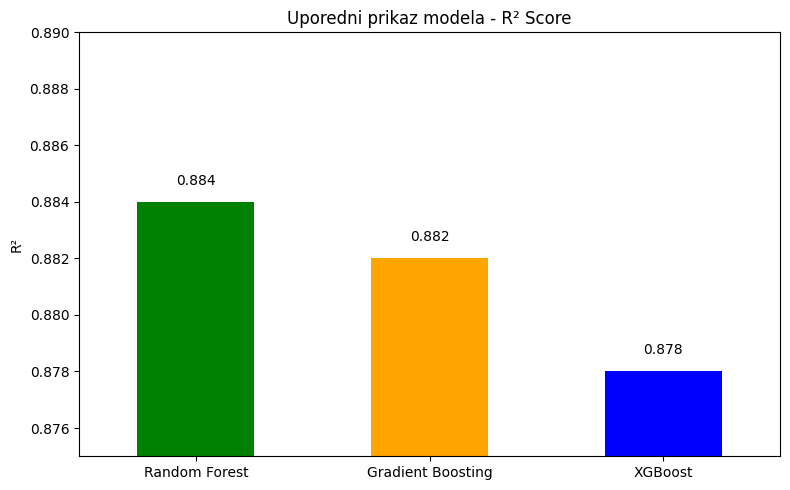

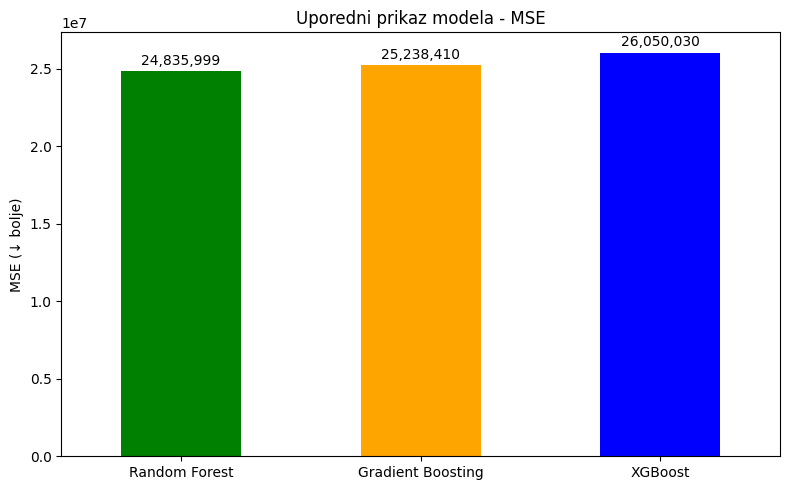

In [60]:
results = {
    "Random Forest": {"MSE": 24835999.17, "R2": 0.884},
    "Gradient Boosting": {"MSE": 25238409.58, "R2": 0.882},
    "XGBoost": {"MSE": 26050030.33, "R2": 0.878}
}
df_results = pd.DataFrame(results).T

plt.figure(figsize=(8,5))
bars_r2 = df_results['R2'].plot(kind='bar', color=['green','orange','blue'])
plt.title("Uporedni prikaz modela - R² Score")
plt.ylabel("R²")
plt.ylim(0.875, 0.89)  # Prilagođen opseg
plt.xticks(rotation=0)

for i, value in enumerate(df_results['R2']):
    plt.text(i, value + 0.0005, f"{value:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
bars_mse = df_results['MSE'].plot(kind='bar', color=['green','orange','blue'])
plt.title("Uporedni prikaz modela - MSE")
plt.ylabel("MSE (↓ bolje)")
plt.xticks(rotation=0)

for i, value in enumerate(df_results['MSE']):
    plt.text(i, value + 2e5, f"{value:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
#Random Forest je pokazao najbolje performanse po oba kriterijuma (najviši R² i najniži MSE), dok je XGBoost ovde bio najlošiji